<a href="https://colab.research.google.com/github/tzuyichao/python-basic/blob/master/colab/chapter4_slotarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SlotArm():
  def __init__(self, p):
    self.p = p
  
  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0

In [3]:
class EpsilonGreedy():
  def __init__(self, epsilon):
    self.epsilon = epsilon
  
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms)
    self.v = np.zeros(n_arms)
  
  def select_arm(self):
    if self.epsilon > random.random():
      return np.random.randint(0, len(self.v))
    else:
      return np.argmax(self.v)
  
  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1
    n = self.n[chosen_arm]
    v = self.v[chosen_arm]
    self.v[chosen_arm] = ((n-1)/float(n)) * v + (1/float(n)) * reward
  
  def label(self):
    return 'ε-greedy(' + str(self.epsilon) + ')'


In [4]:
class UCB1():
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms)
    self.w = np.zeros(n_arms)
    self.v = np.zeros(n_arms)
  
  def select_arm(self):
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return i
    return np.argmax(self.v)
  
  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1
    if reward == 1.0:
      self.w[chosen_arm] += 1
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return
    for i in range(len(self.v)):
      self.v[i] = self.w[i]/self.n[i] + (2 * math.log(t)/math.log(t)/self.n[i]) ** 0.5
    
  def label(self):
    return 'ucb1'

In [5]:
def play(algo, arms, num_sims, num_time):
  times = np.zeros(num_sims*num_time)
  rewards = np.zeros(num_sims*num_time)
  for sim in range(num_sims):
    algo.initialize(len(arms))
    for time in range(num_time):
      index = sim * num_time + time
      times[index] = time+1
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward
      algo.update(chosen_arm, reward, time+1)
  return [times, rewards]


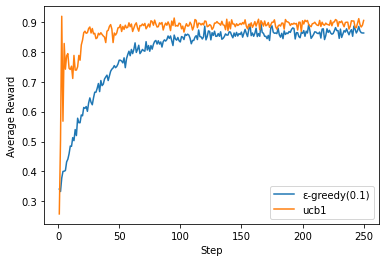

In [9]:
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:
  results = play(algo, arms, 1000, 250)

  df = pd.DataFrame({'times': results[0], 'rewards': results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label=algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc='best')
plt.show()